In [ ]:
from nw_uncertainty.nuq import NuqRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(font_scale=1.4)

# 1-dim X

In [ ]:
x_distribution = sps.beta(5, 2)
xi_distribution = sps.norm
mean = lambda x : np.sin(x * 2 * np.pi)
sigma = lambda x : np.exp(-np.abs(0.5 - x) * 5) / 5

In [ ]:
n = 10000
sample = x_distribution.rvs(size=n)
y = mean(sample) + sigma(sample) * xi_distribution.rvs(size=n)

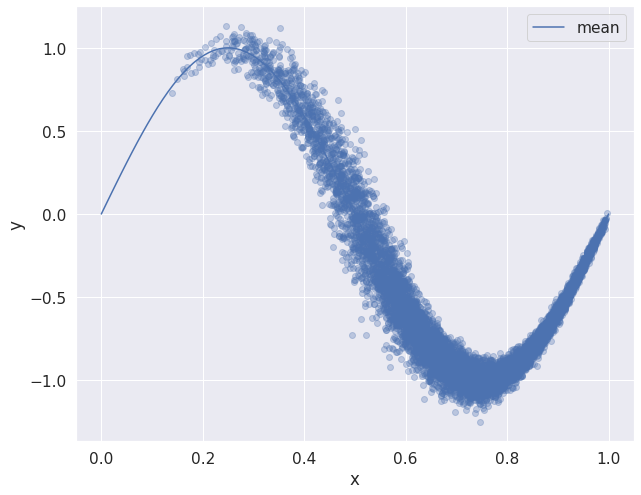

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(sample, y, alpha=0.3)

grid = np.linspace(0, 1, 100)
plt.plot(grid, mean(grid), label='mean')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
regressor = NuqRegressor()
fitted_regressor = regressor.fit(sample.reshape(-1, 1), y)

In [ ]:
test_sampels = np.linspace(0, 1, 500)
uncertainty = regressor.predict_uncertainty(test_sampels.reshape(-1, 1), infinity=100)

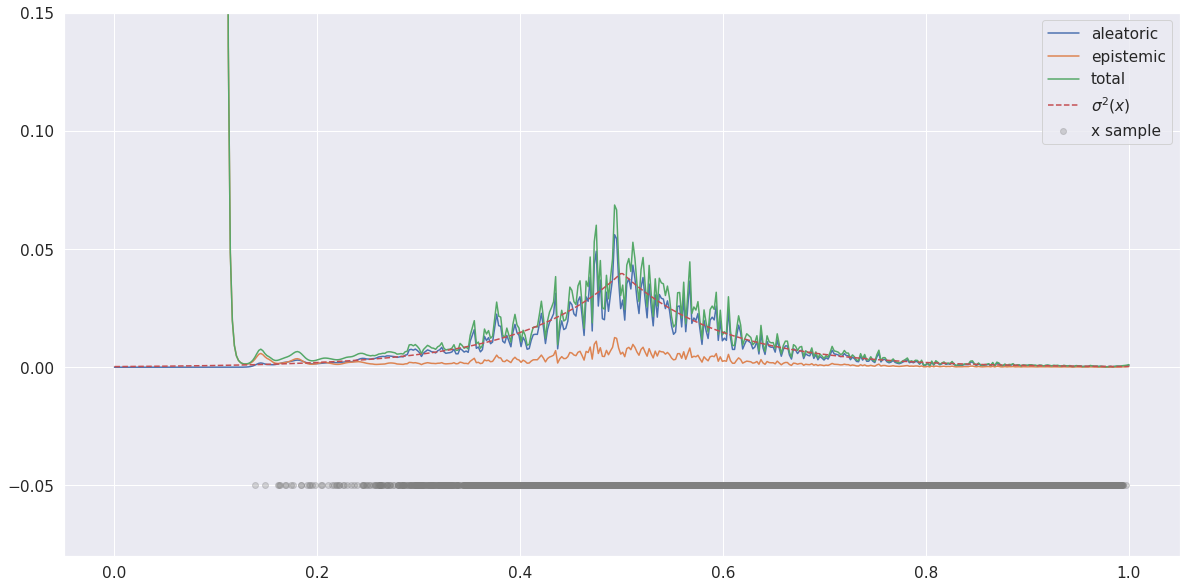

In [ ]:
plt.figure(figsize=(20, 10))
    
plt.plot(test_sampels, uncertainty['aleatoric'], label='aleatoric')
plt.plot(test_sampels, uncertainty['epistemic'], label='epistemic')
plt.plot(test_sampels, uncertainty['total'], label='total')
plt.plot(test_sampels, sigma(test_sampels) ** 2, label='$\\sigma^2(x)$', linestyle='--')

plt.scatter(sample, [-0.05] * len(sample), alpha=0.3, label='x sample', color='gray')

plt.ylim((-0.08, 0.15))
plt.legend()
plt.show()

# 2-dim X

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
n = 10000
points, lables = make_blobs(n_samples=n, centers=[
    [0., 0.],
    [6, 6],
    [-6, -6]
])
radius = np.sqrt((points ** 2).sum(axis=1))
mean = np.sin(radius)
sigma = np.exp(-radius / 10)

mean_function = lambda mesh : np.sin(np.sqrt(mesh[0] ** 2 + mesh[1] ** 2))
sigma_function = lambda mesh : np.exp(- np.sqrt(mesh[0] ** 2 + mesh[1] ** 2) / 10)

y = mean + sigma * xi_distribution.rvs(size=n)

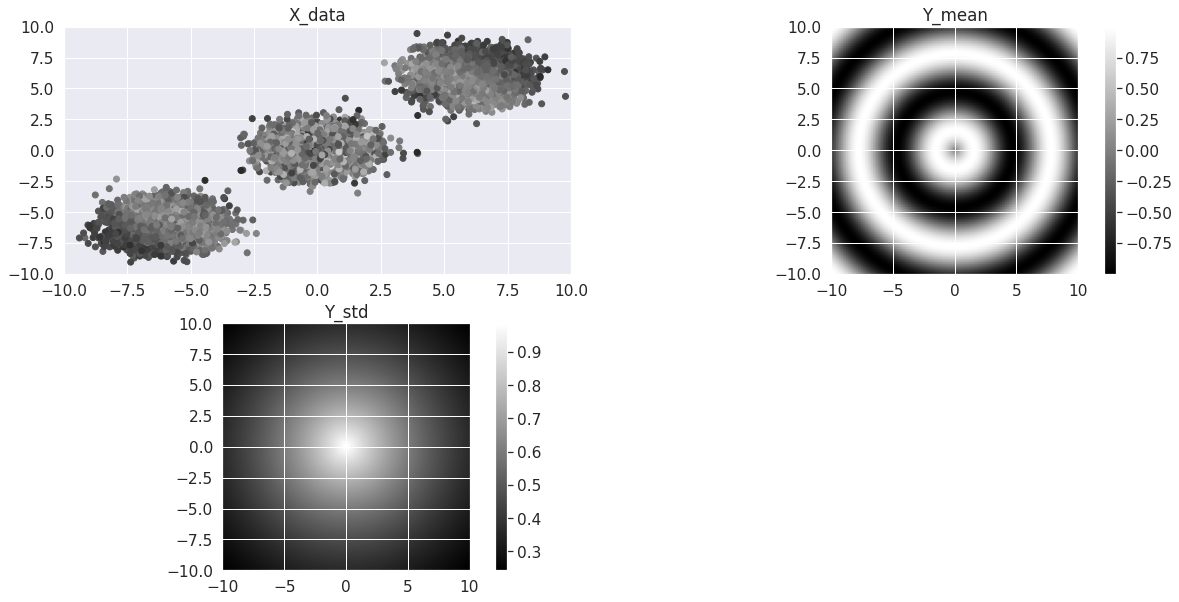

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.scatter(points[:, 0], points[:, 1], cmap='gray', c=y)
plt.xlim((-10, 10))
plt.ylim(-10, 10)
plt.title('X_data')

plt.subplot(2, 2, 2)
X_1 = np.linspace(-10, 10, 100)
X_2 = np.linspace(-10, 10, 100)
mesh = mean_function(np.meshgrid(X_1, X_2))
im = plt.imshow(mesh, cmap='gray', extent=[-10, 10, -10, 10])
plt.title('Y_mean')
plt.colorbar(im)

plt.subplot(2, 2, 3)
mesh = sigma_function(np.meshgrid(X_1, X_2))
im = plt.imshow(mesh, cmap='gray', extent=[-10, 10, -10, 10])
plt.title('Y_std')
plt.colorbar(im)


plt.show()

In [ ]:
regressor = NuqRegressor()
fitted_regressor = regressor.fit(points, y)

In [ ]:
num_points = 100

X_1 = np.repeat(np.linspace(-10, 10, num_points), num_points).reshape(-1, 1)
X_2 = np.tile(np.linspace(-10, 10, num_points), num_points).reshape(-1, 1)
test_points = np.concatenate([X_1, X_2], axis=1)

In [ ]:
uncertainty = fitted_regressor.predict_uncertainty(test_points, infinity=4)

aleatoric = uncertainty['aleatoric']
epistemic = uncertainty['epistemic']
total = uncertainty['total']

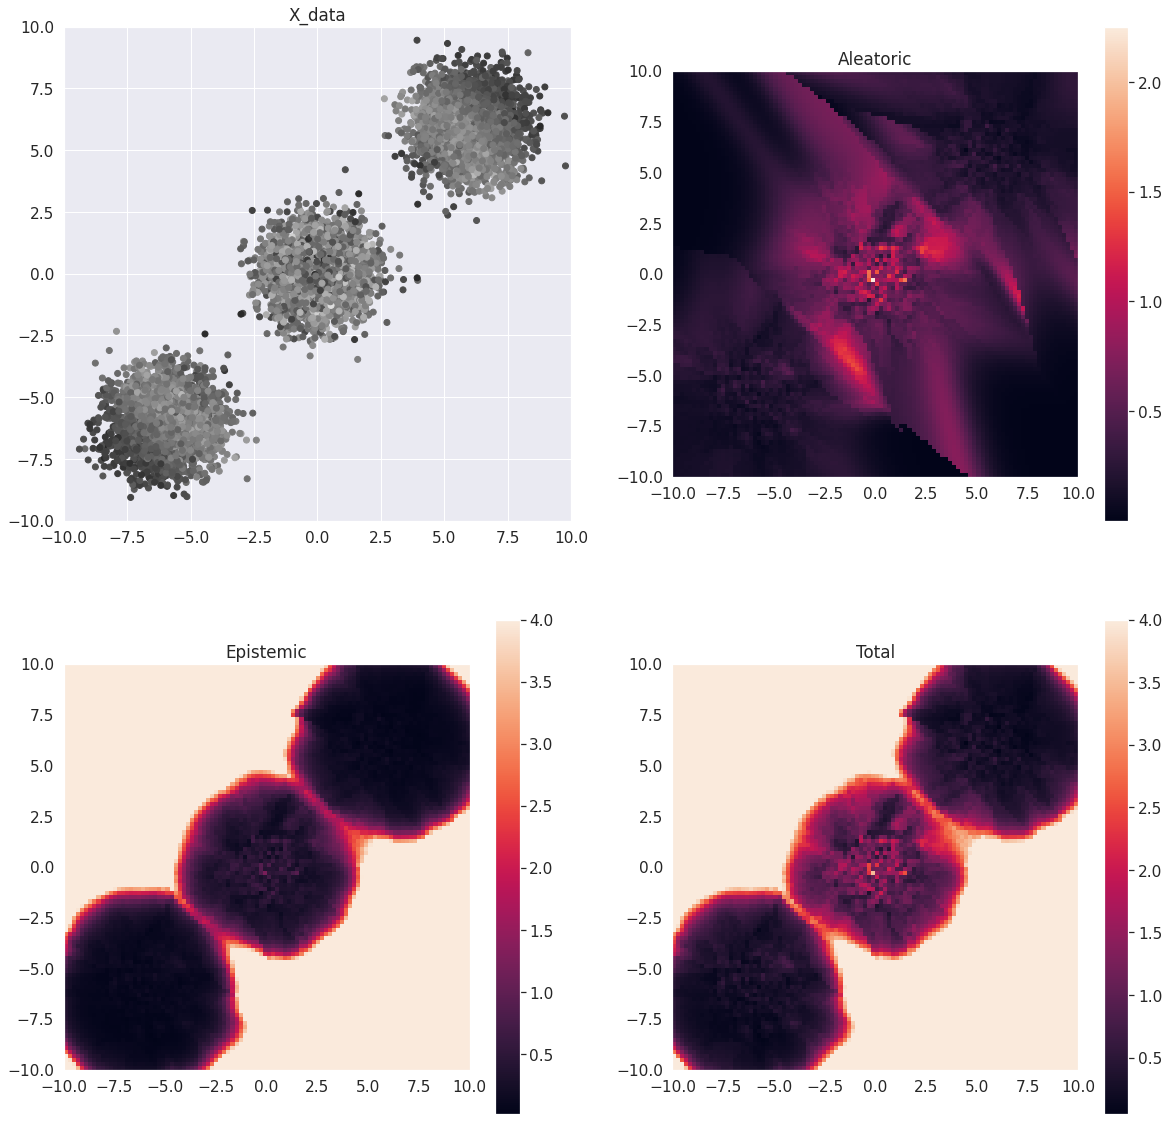

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.scatter(points[:, 0], points[:, 1], cmap='gray', c=y)
plt.xlim((-10, 10))
plt.ylim(-10, 10)
plt.title('X_data')

plt.subplot(2, 2, 2)
im = plt.imshow(aleatoric.reshape(num_points, num_points)[::-1, :], extent=[-10, 10, -10, 10])
plt.colorbar(im)
plt.title('Aleatoric')
plt.grid(False)

plt.subplot(2, 2, 3)
im = plt.imshow(epistemic.reshape(num_points, num_points)[::-1, :], extent=[-10, 10, -10, 10])
plt.colorbar(im)
plt.title('Epistemic')
plt.grid(False)

plt.subplot(2, 2, 4)
im = plt.imshow(total.reshape(num_points, num_points)[::-1, :], extent=[-10, 10, -10, 10])
plt.colorbar(im)
plt.title('Total')
plt.grid(False)

plt.show()